<a href="https://colab.research.google.com/github/yanviegas/eu_na_imersao_dados_2020_2/blob/main/aula_02_imersao_dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evento **IMERSÃO DADOS 2020.2**, organizado pela Alura Cursos Online

O Projeto teve como objetivo entender na prática um pouco sobre as habilidades, o trabalho e a carreira do profissional da área de Ciência de Dados, usando como trilha a análise de uma amostra dos dados do ENEM 2019.

#**AULA 02: ANÁLISE EXPLORATÓRIA DE DADOS**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

In [3]:
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
dados.query("SG_UF_RESIDENCIA == 'BA'")[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
1529,425.6,405.7,422.8,545.1,520.0
2578,392.4,414.0,457.9,395.7,340.0
2823,446.6,482.4,574.5,407.3,560.0
2826,330.7,461.8,443.4,466.5,620.0
5499,458.0,535.1,479.6,521.6,520.0
...,...,...,...,...,...
127373,480.4,501.5,386.7,485.3,520.0
127374,NaN,NaN,NaN,NaN,NaN
127376,449.1,380.9,418.2,450.3,520.0
127377,NaN,516.0,NaN,497.9,440.0


In [5]:
dados.query("NO_MUNICIPIO_RESIDENCIA == 'Salvador'")[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
1529,425.6,405.7,422.8,545.1,520.0
5503,428.7,460.5,390.4,541.5,620.0
5513,362.9,530.5,525.6,441.4,420.0
5515,602.8,630.0,759.8,595.4,820.0
5519,474.5,444.6,516.3,466.6,500.0
...,...,...,...,...,...
127274,567.5,524.2,436.6,566.2,520.0
127326,551.7,555.1,624.5,572.3,680.0
127327,375.3,381.6,389.0,496.8,540.0
127374,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'GRÁFICO DE PIZZA NÃO PRESTA!')

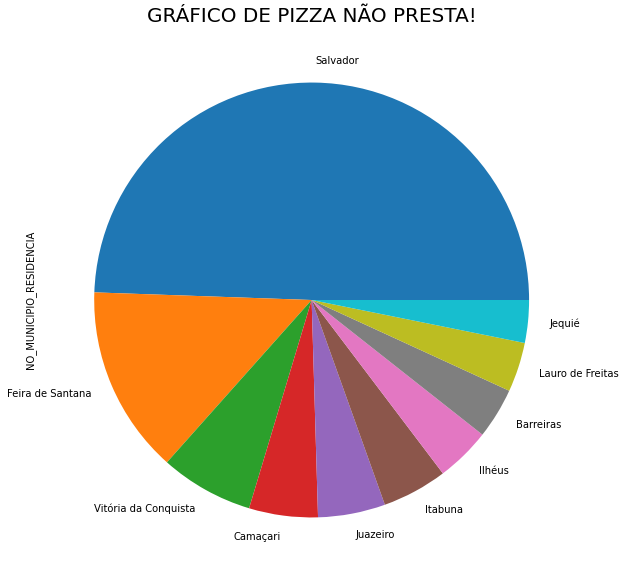

In [6]:
dados.query("SG_UF_RESIDENCIA == 'BA'")["NO_MUNICIPIO_RESIDENCIA"].value_counts() \
                                                                  .head(10).plot.pie(figsize = (10,10))
plt.title("GRÁFICO DE PIZZA NÃO PRESTA!", fontsize = 20)

Text(0, 0.5, 'Número de Inscritos')

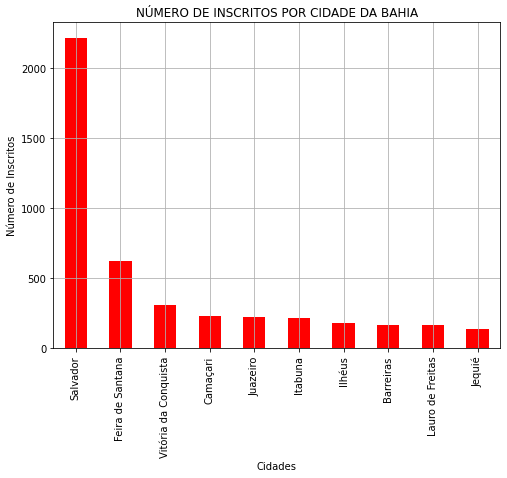

In [7]:
inscritos_residentes_na_bahia = dados.query("SG_UF_RESIDENCIA == 'BA'")["NO_MUNICIPIO_RESIDENCIA"].value_counts(normalize = False)
inscritos_residentes_na_bahia.sort_values(ascending = False).head(10).plot.bar(grid = True, figsize = (8,6), color = "red")
plt.title("NÚMERO DE INSCRITOS POR CIDADE DA BAHIA")
plt.xlabel("Cidades"); plt.ylabel("Número de Inscritos")

In [8]:
len(inscritos_residentes_na_bahia)

406

In [9]:
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Text(0.5, 1.0, 'BOXPLOT: NOTAS DE MATEMÁTICA x RENDA MENSAL')

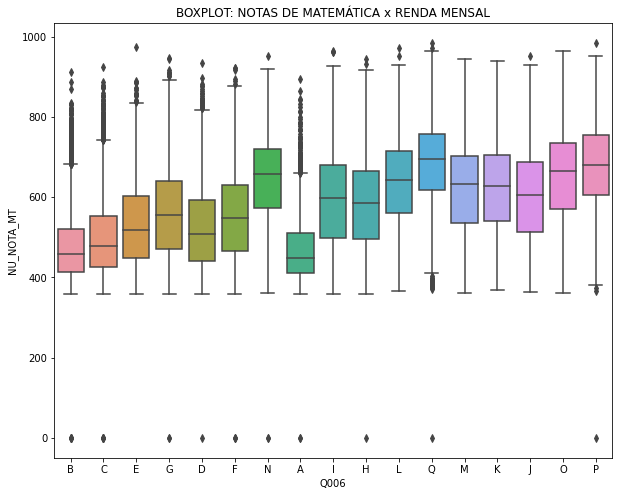

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_MT", data = dados)
plt.title("BOXPLOT: NOTAS DE MATEMÁTICA x RENDA MENSAL")

In [11]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'BOXPLOT: NOTAS DE MATEMÁTICA x RENDA MENSAL')

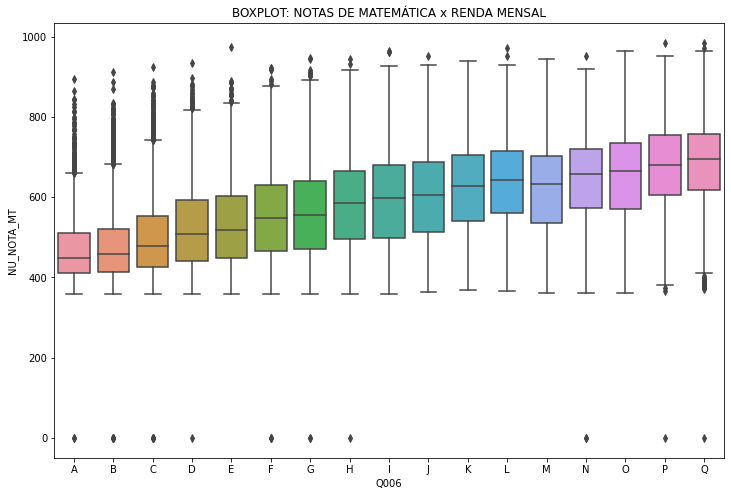

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title("BOXPLOT: NOTAS DE MATEMÁTICA x RENDA MENSAL")

In [13]:
pretos = dados.query("TP_COR_RACA == 2")["Q006"].value_counts().sort_index()
brancos = dados.query("TP_COR_RACA == 1")["Q006"].value_counts().sort_index()
pretos_renda = pd.DataFrame(pretos)
brancos_renda = pd.DataFrame(brancos)

In [14]:
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'RELAÇÃO ENTRE NÚMERO DE INSCRITOS PRETOS E RENDA MENSAL')

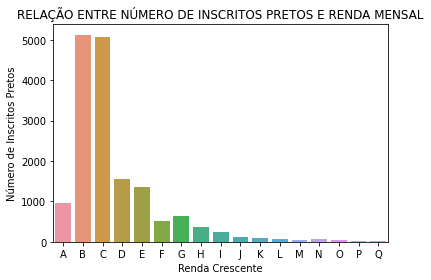

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize = (12,8))
sns.barplot(x = renda_ordenada, y = pretos_renda["Q006"])
plt.xlabel("Renda Crescente"); plt.ylabel("Número de Inscritos Pretos")
plt.title("RELAÇÃO ENTRE NÚMERO DE INSCRITOS PRETOS E RENDA MENSAL")

Text(0.5, 1.0, 'RELAÇÃO ENTRE NÚMERO DE INSCRITOS BRANCOS E RENDA MENSAL')

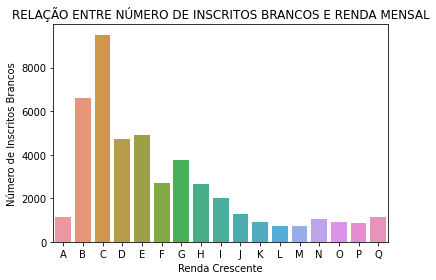

In [16]:
sns.barplot(x = renda_ordenada, y = brancos_renda["Q006"])
plt.xlabel("Renda Crescente"); plt.ylabel("Número de Inscritos Brancos")
plt.title("RELAÇÃO ENTRE NÚMERO DE INSCRITOS BRANCOS E RENDA MENSAL")

In [17]:
dados[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,435.6,512.3,432.4,488.6,420.0
1,NaN,409.3,NaN,375.3,400.0
2,423.2,499.1,427.2,441.0,560.0
3,426.2,578.1,499.9,551.5,500.0
4,516.5,571.3,424.5,511.2,780.0
...,...,...,...,...,...
127375,502.4,559.6,539.7,525.7,740.0
127376,449.1,380.9,418.2,450.3,520.0
127377,NaN,516.0,NaN,497.9,440.0
127378,564.7,416.2,455.7,517.3,620.0


In [18]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados[provas].sum(axis = 1)

0         2288.9
1         1184.6
2         2350.5
3         2555.7
4         2803.5
           ...  
127375    2867.4
127376    2218.5
127377    1453.9
127378    2573.9
127379    2287.8
Length: 127380, dtype: float64

In [19]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados["NU_NOTA_SOMA_TOTAL"] = dados[provas].sum(axis = 1)
provas.append("NU_NOTA_SOMA_TOTAL")
dados[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_SOMA_TOTAL
0,435.6,512.3,432.4,488.6,420.0,2288.9
1,NaN,409.3,NaN,375.3,400.0,1184.6
2,423.2,499.1,427.2,441.0,560.0,2350.5
3,426.2,578.1,499.9,551.5,500.0,2555.7
4,516.5,571.3,424.5,511.2,780.0,2803.5
...,...,...,...,...,...,...
127375,502.4,559.6,539.7,525.7,740.0,2867.4
127376,449.1,380.9,418.2,450.3,520.0,2218.5
127377,NaN,516.0,NaN,497.9,440.0,1453.9
127378,564.7,416.2,455.7,517.3,620.0,2573.9


Text(0, 0.5, 'Somatórios das Notas')

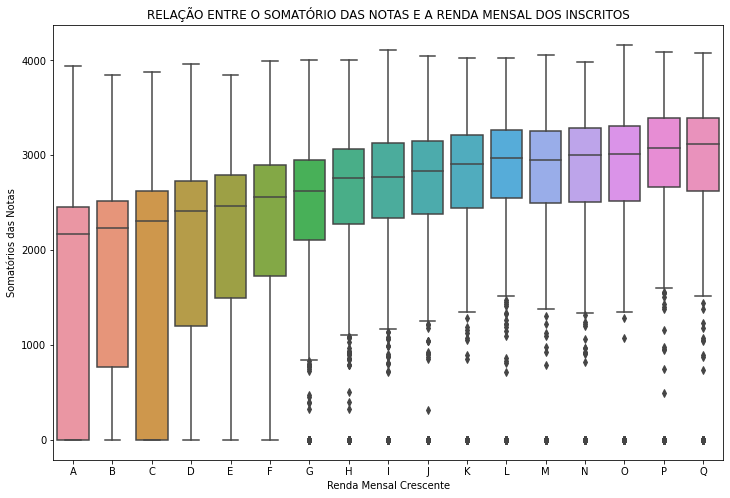

In [20]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_SOMA_TOTAL", data = dados, order = renda_ordenada)
plt.title("RELAÇÃO ENTRE O SOMATÓRIO DAS NOTAS E A RENDA MENSAL DOS INSCRITOS")
plt.xlabel("Renda Mensal Crescente"); plt.ylabel("Somatórios das Notas")

Text(0.5, 1.0, 'NÚMERO DE INSCRITOS x SOMATÓRIO DAS NOTAS')

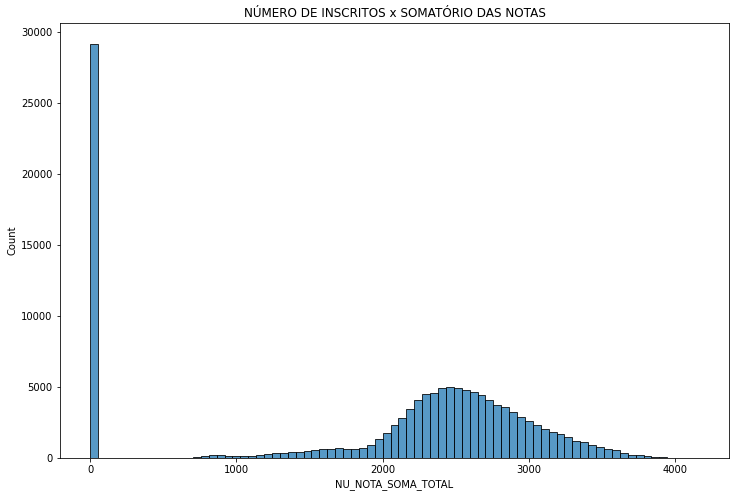

In [21]:
plt.figure(figsize = (12,8))
sns.histplot(dados["NU_NOTA_SOMA_TOTAL"])
plt.title("NÚMERO DE INSCRITOS x SOMATÓRIO DAS NOTAS")

In [22]:
dados_sem_notas_nulas = dados.query("NU_NOTA_SOMA_TOTAL != 0")
dados_sem_notas_nulas

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_SOMA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,1,3142700.0,Montalvânia,31.0,MG,2,0,2,1.0,0,31062961.0,3142700.

Text(0, 0.5, 'Somatórios das Notas')

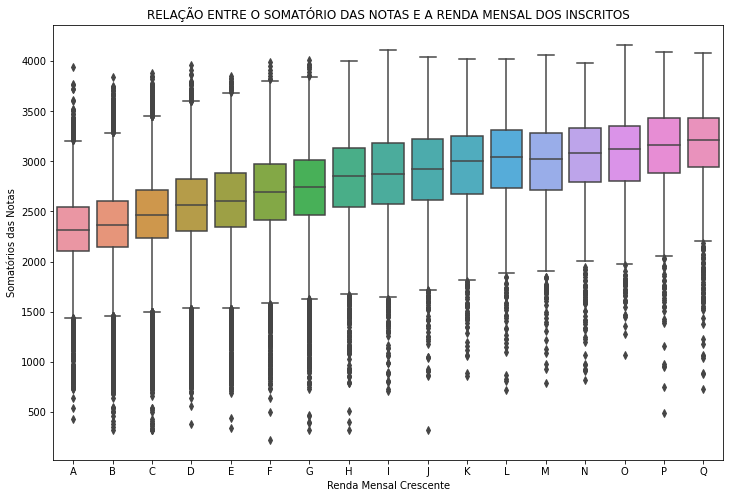

In [23]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_SOMA_TOTAL", data = dados_sem_notas_nulas, order = renda_ordenada)
plt.title("RELAÇÃO ENTRE O SOMATÓRIO DAS NOTAS E A RENDA MENSAL DOS INSCRITOS")
plt.xlabel("Renda Mensal Crescente"); plt.ylabel("Somatórios das Notas")

Text(0, 0.5, 'Somatórios das Notas')

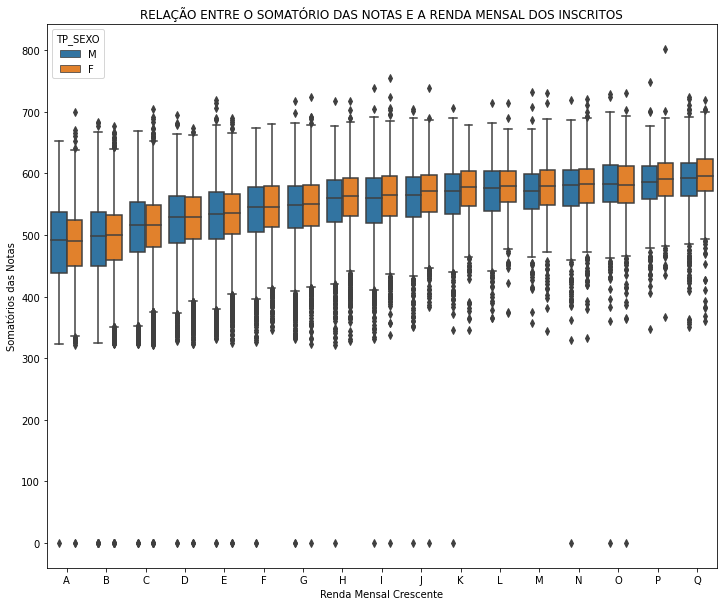

In [24]:
plt.figure(figsize = (12,10))
sns.boxplot(x = "Q006", y = "NU_NOTA_LC", data = dados_sem_notas_nulas, hue = "TP_SEXO", order = renda_ordenada)
plt.title("RELAÇÃO ENTRE O SOMATÓRIO DAS NOTAS E A RENDA MENSAL DOS INSCRITOS")
plt.xlabel("Renda Mensal Crescente"); plt.ylabel("Somatórios das Notas")

#A02. Desafio 01: Plotar o gráfico do somatório das notas das provas pela renda mensal, usando apenas dados dos candidatos residentes no meu estado (neste caso, Bahia).


Text(0, 0.5, 'Somatórios das Notas')

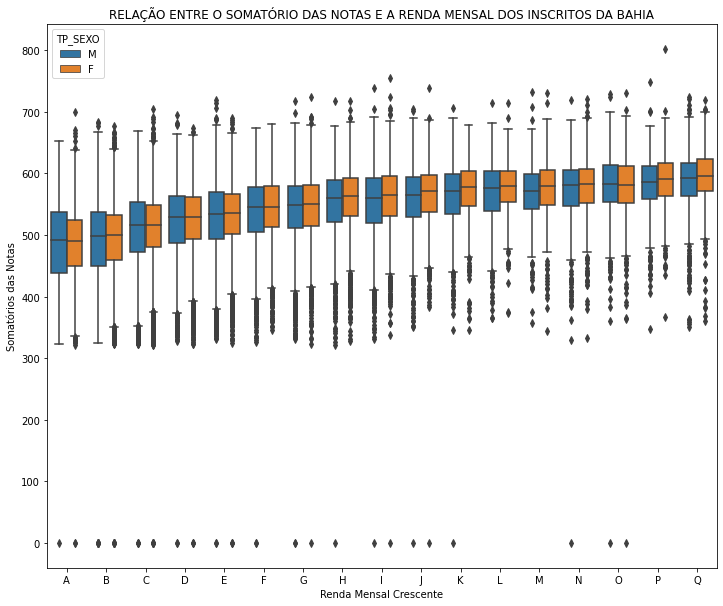

In [25]:
dados_sem_notas_nulas_da_ba = dados_sem_notas_nulas.query("SG_UF_RESIDENCIA == 'BA'")
plt.figure(figsize = (12,10))
sns.boxplot(x = "Q006", y = "NU_NOTA_LC", data = dados_sem_notas_nulas, hue = "TP_SEXO", order = renda_ordenada)
plt.title("RELAÇÃO ENTRE O SOMATÓRIO DAS NOTAS E A RENDA MENSAL DOS INSCRITOS DA BAHIA")
plt.xlabel("Renda Mensal Crescente"); plt.ylabel("Somatórios das Notas")

#A02. Desafio 02: Descobrir a proporção de candidatos por unidade federativa.

In [26]:
dados.query("NU_IDADE < 18")["SG_UF_RESIDENCIA"].value_counts(normalize = True)

SP    0.234347
MG    0.100704
BA    0.063796
CE    0.062516
PE    0.057778
PR    0.056466
RJ    0.052849
PA    0.040589
GO    0.038380
MA    0.037260
RS    0.031690
PB    0.026825
SC    0.025448
PI    0.021703
MT    0.019590
ES    0.016549
DF    0.015109
AL    0.014277
RN    0.013732
AM    0.013700
MS    0.013476
SE    0.012964
TO    0.011012
RO    0.007490
AP    0.006018
AC    0.003489
RR    0.002241
Name: SG_UF_RESIDENCIA, dtype: float64

#A02. Desafio 03: Criar uma função para a plotagem do gráfico BoxPlot do desafio anterior.

In [27]:
def sns_boxplot(x1, y1, data1):
  plt.figure(figsize = (12,8))
  sns.boxplot(x = x1, y = y1, data = data1, hue = "TP_SEXO", order = renda_ordenada)
  plt.title("SOMATÓRIO DAS NOTAS x RENDA MENSAL")
  plt.xlabel("Renda Mensal Crescente"); plt.ylabel("Somatórios das Notas")

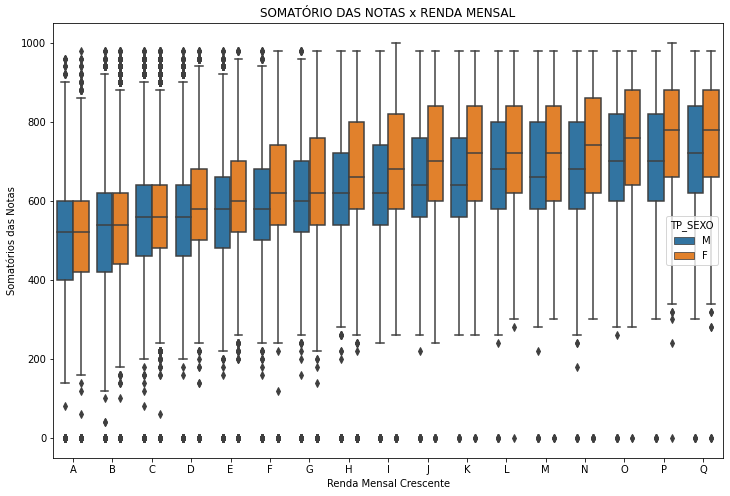

In [28]:
sns_boxplot("Q006", "NU_NOTA_REDACAO", dados_sem_notas_nulas)

#A02. Desafio 04: Descobrir os critérios para alguns candidatos terem tirado zero no somatório das notas.

In [29]:
dados_notas_nulas = dados.query("NU_NOTA_SOMA_TOTAL == 0")
dados_notas_nulas

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_SOMA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,1,1506807.0,Santarém,15.0,PA,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,B,A,B,2,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,1,1501709.0,Bragança,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,4,B,A,B,D,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,1,1721208.0,Tocantinópolis,17.0,TO,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,C,C,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,1,2108108.0,Paulo Ramos,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,1,1504422.0,Marituba,15.0,PA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,F,B,6,G,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,D,A,A,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127351,190006118552,2019,2604106,Caruaru,26,PE,20,F,1,1,1,2604106.0,Caruaru,26.0,PE,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,D,B,5,H,A,C,D,B,A,B,B,B,A,B,A,A,D,A,A,E,A,B,B,0.0
127365,190006119756,2019,2302503,Brejo Santo,23,CE,22,F,1,3,1,2308104.0,Mauriti,23.0,CE,2,0,2,1.0,0,23169249.0,2302503.0,Brejo Santo,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,5,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
127366,190006119783,2019,2304400,Fortaleza,23,CE,27,F,1,3,1,2304400.0,Fortaleza,23.0,CE,2,0,2,NaN,0,23071460.0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,B,A,B,B,A,B,B,A,A,A,B,A,A,A,A,A,A,B,B,A,0.0
127368,190006119802,2019,2507507,João Pessoa,25,PB,18,M,1,2,1,2507507.0,João Pessoa,25.0,PB,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,A,A,5,C,A,C,E,B,A,B,A,A,A,A,A,B,B,A,A,C,A,A,B,0.0


In [32]:
#inscritos que faltaram, no mínimo, em uma das provas
len(dados_notas_nulas.query("TP_PRESENCA_CN == 0 or TP_PRESENCA_CH == 0 or TP_PRESENCA_MT == 0 or TP_PRESENCA_LC == 0"))

29160

In [33]:
#inscritos que foram eliminados, no mínimo, em uma das provas
len(dados_notas_nulas.query("TP_PRESENCA_CN == 2 or TP_PRESENCA_CH == 2 or TP_PRESENCA_MT == 2 or TP_PRESENCA_LC == 2"))

120

In [34]:
#total de inscritos que zeraram todas as provas
len(dados_notas_nulas)

29162

#A02. Desafio 05: Descobrir se quem foi eliminado tirou zero ou NaN (not a number).

In [35]:
dados.query("TP_PRESENCA_MT == 2")["NU_NOTA_MT"].unique()

array([nan])

In [36]:
dados.query("TP_PRESENCA_MT == 0")["NU_NOTA_MT"].unique()

array([nan])

In [37]:
dados.query("TP_PRESENCA_MT == 1")["NU_NOTA_MT"].unique()

array([432.4, 427.2, 499.9, ..., 827.5, 899.3, 867.1])

#A02. Desafio 06: Verificar a proporção dos participantes treineiros e não-treineiros entre diferentes intervalos de renda mensal.

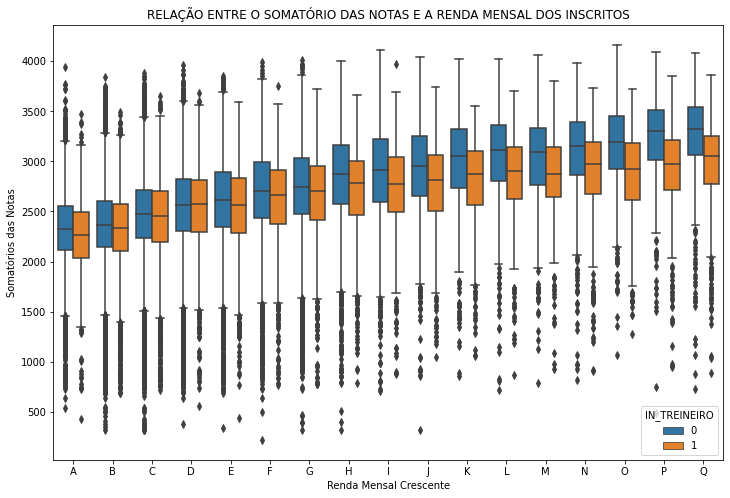

In [38]:
def sns_boxplot(x1, y1, data1):
  plt.figure(figsize = (12,8))
  sns.boxplot(x = x1, y = y1, data = data1, hue = "IN_TREINEIRO", order = renda_ordenada)
  plt.title("RELAÇÃO ENTRE O SOMATÓRIO DAS NOTAS E A RENDA MENSAL DOS INSCRITOS")
  plt.xlabel("Renda Mensal Crescente"); plt.ylabel("Somatórios das Notas")

sns_boxplot("Q006", "NU_NOTA_SOMA_TOTAL", dados_sem_notas_nulas)

In [39]:
treineiros = dados_sem_notas_nulas.query("IN_TREINEIRO == 1")["Q006"].value_counts().sort_index()
nao_treineiros = dados_sem_notas_nulas.query("IN_TREINEIRO == 0")["Q006"].value_counts().sort_index()
df_t = pd.DataFrame({"Treineiros": treineiros, "Não Treineiros": nao_treineiros})
df_t

,Treineiros,Não Treineiros
A,510,3769
B,2618,21284
C,2317,21684
D,1113,8438
E,1184,7999
F,797,3653
G,1005,5144
H,929,3125
I,676,2351
J,448,1346


Text(0, 0.5, 'Proporção de Inscritos')

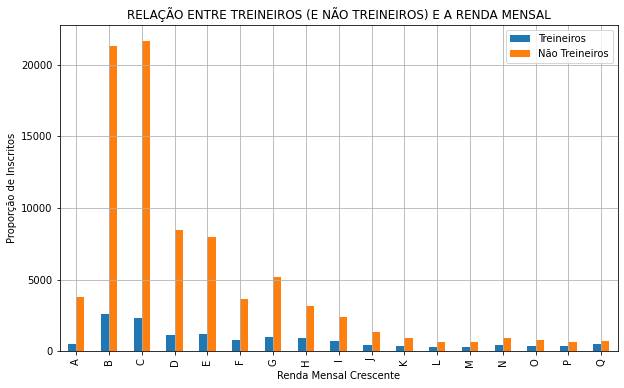

In [40]:
df_t.plot.bar(figsize = (10,6), grid = True)
plt.title("RELAÇÃO ENTRE TREINEIROS (E NÃO TREINEIROS) E A RENDA MENSAL")
plt.xlabel("Renda Mensal Crescente"); plt.ylabel("Proporção de Inscritos")

#A02. Desafio 07: Cumprir o mesmo desafio anterior, mas seguindo o critério de ter ou não internet em casa.

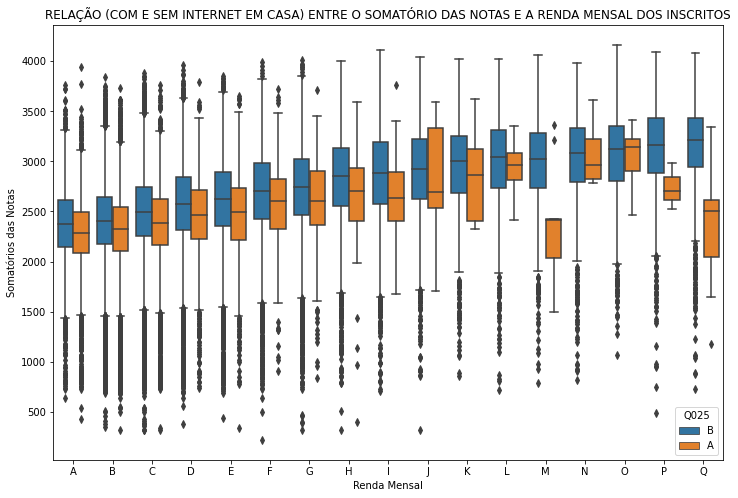

In [43]:
def sns_boxplot(x1, y1, data1):
  plt.figure(figsize = (12,8))
  sns.boxplot(x = x1, y = y1, data = data1, hue = "Q025", order = renda_ordenada)
  plt.title("RELAÇÃO (COM E SEM INTERNET EM CASA) ENTRE O SOMATÓRIO DAS NOTAS E A RENDA MENSAL DOS INSCRITOS")
  plt.xlabel("Renda Mensal"); plt.ylabel("Somatórios das Notas")

sns_boxplot("Q006", "NU_NOTA_SOMA_TOTAL", dados_sem_notas_nulas)

Text(0, 0.5, 'Proporção de Inscritos')

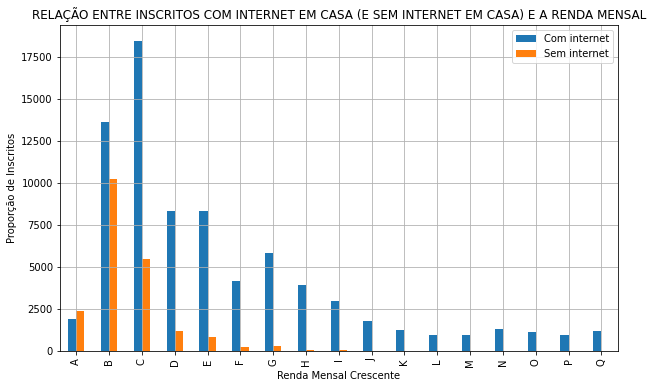

In [42]:
sem_internet = dados_sem_notas_nulas.query("Q025 == 'A'")["Q006"].value_counts().sort_index()
com_internet = dados_sem_notas_nulas.query("Q025 == 'B'")["Q006"].value_counts().sort_index()
df_i = pd.DataFrame({"Com internet": com_internet, "Sem internet": sem_internet})
df_i.plot.bar(figsize = (10,6), grid = True)
plt.title("RELAÇÃO ENTRE INSCRITOS COM INTERNET EM CASA (E SEM INTERNET EM CASA) E A RENDA MENSAL")
plt.xlabel("Renda Mensal Crescente"); plt.ylabel("Proporção de Inscritos")